In [2]:
import os
import pandas as pd

# Define the paths to the training and testing folders
train_path = "C:/Users/HP/Desktop/My Papers/Conferences/ISACC_2025/Benchmark/data/archive/OCR_Bangla/Bangla Handwritten Characters Dataset/Train"
test_path = "C:/Users/HP/Desktop/My Papers/Conferences/ISACC_2025/Benchmark/data/archive/OCR_Bangla/Bangla Handwritten Characters Dataset/Test"

def count_images(folder_path):
    """
    Counts the number of images per category in the given folder.
    """
    categories = []
    image_counts = []
    
    for category in os.listdir(folder_path):
        category_path = os.path.join(folder_path, category)
        if os.path.isdir(category_path):
            categories.append(category)
            image_counts.append(len([f for f in os.listdir(category_path) if os.path.isfile(os.path.join(category_path, f))]))
    
    return pd.DataFrame({'Category': categories, 'Image Count': image_counts})

# Count images in training and testing folders
train_counts = count_images(train_path)
test_counts = count_images(test_path)

# Merge the counts for comparison
merged_counts = train_counts.merge(test_counts, on="Category", suffixes=("_Train", "_Test"))

# Display the results
print("Training and Testing Data Distribution:")
print(merged_counts)

# Check if any imbalance exists
if (merged_counts['Image Count_Train'] == merged_counts['Image Count_Train'].iloc[0]).all() and \
   (merged_counts['Image Count_Test'] == merged_counts['Image Count_Test'].iloc[0]).all():
    print("No data imbalance detected.")
else:
    print("Data imbalance detected.")
    

# Save the combined DataFrame as a CSV file for reference
output_path = "C:/Users/HP/Desktop/My Papers/Conferences/ISACC_2025/Benchmark/data_distribution.csv"
merged_counts.to_csv(output_path, index=False)

# Display the combined DataFrame
print("Combined Data Distribution:")
print(merged_counts)



Training and Testing Data Distribution:
   Category  Image Count_Train  Image Count_Test
0       172                240                60
1       173                240                60
2       174                240                60
3       175                240                60
4       176                240                60
5       177                240                60
6       178                240                60
7       179                240                60
8       180                240                60
9       181                240                60
10      182                240                60
11      183                240                60
12      184                240                60
13      185                240                60
14      186                240                60
15      187                240                60
16      188                240                60
17      189                240                60
18      190                24

C:\Users\HP\AppData\Local\Temp\ipykernel_1296\981274164.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data["Dataset"], y=data["Image Count"], palette="viridis", ax=axes[1])


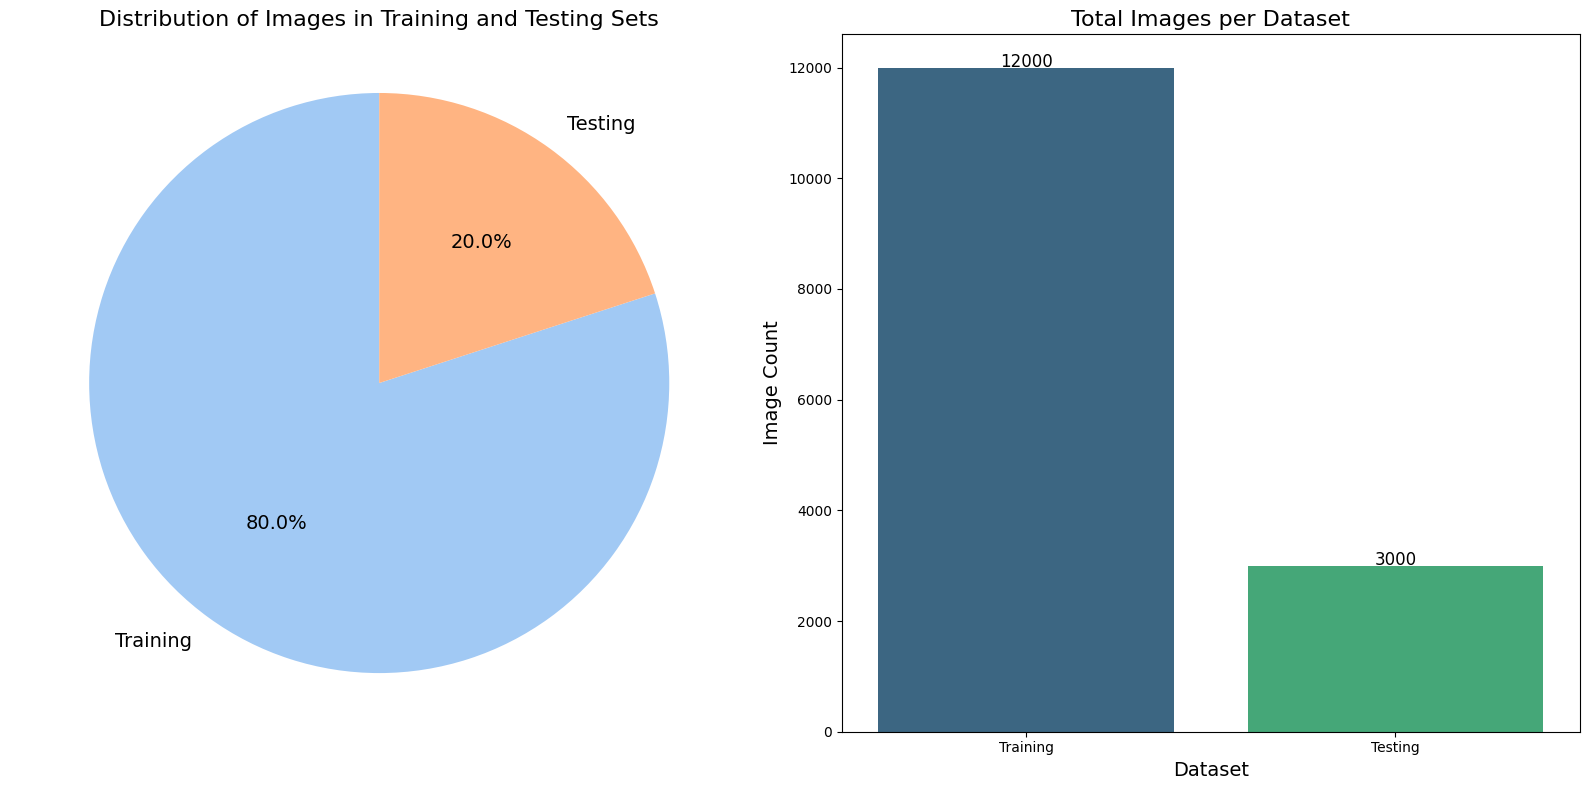

In [4]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Define the paths to the training and testing folders
train_path = "C:/Users/HP/Desktop/My Papers/Conferences/ISACC_2025/Benchmark/data/archive/OCR_Bangla/Bangla Handwritten Characters Dataset/Train"
test_path = "C:/Users/HP/Desktop/My Papers/Conferences/ISACC_2025/Benchmark/data/archive/OCR_Bangla/Bangla Handwritten Characters Dataset/Test"

def count_total_images(folder_path):
    """
    Counts the total number of images in all categories within the folder.
    """
    total_count = 0
    for category in os.listdir(folder_path):
        category_path = os.path.join(folder_path, category)
        if os.path.isdir(category_path):
            total_count += len([f for f in os.listdir(category_path) if os.path.isfile(os.path.join(category_path, f))])
    return total_count

# Count total images in training and testing folders
total_train_images = count_total_images(train_path)
total_test_images = count_total_images(test_path)

# Data for visualization
data = {
    "Dataset": ["Training", "Testing"],
    "Image Count": [total_train_images, total_test_images]
}

# Create a figure with subplots for both visualizations
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Pie chart
colors = sns.color_palette("pastel")[:2]  # Use pastel colors for aesthetics
axes[0].pie(data["Image Count"], labels=data["Dataset"], autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize': 14})
axes[0].set_title("Distribution of Images in Training and Testing Sets", fontsize=16)
axes[0].axis("equal")  # Equal aspect ratio ensures the pie chart is circular

# Bar chart
sns.barplot(x=data["Dataset"], y=data["Image Count"], palette="viridis", ax=axes[1])
axes[1].set_title("Total Images per Dataset", fontsize=16)
axes[1].set_xlabel("Dataset", fontsize=14)
axes[1].set_ylabel("Image Count", fontsize=14)
for i, count in enumerate(data["Image Count"]):
    axes[1].text(i, count + 10, str(count), ha='center', fontsize=12)  # Display counts above bars

# Adjust spacing
plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_13192\820584998.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


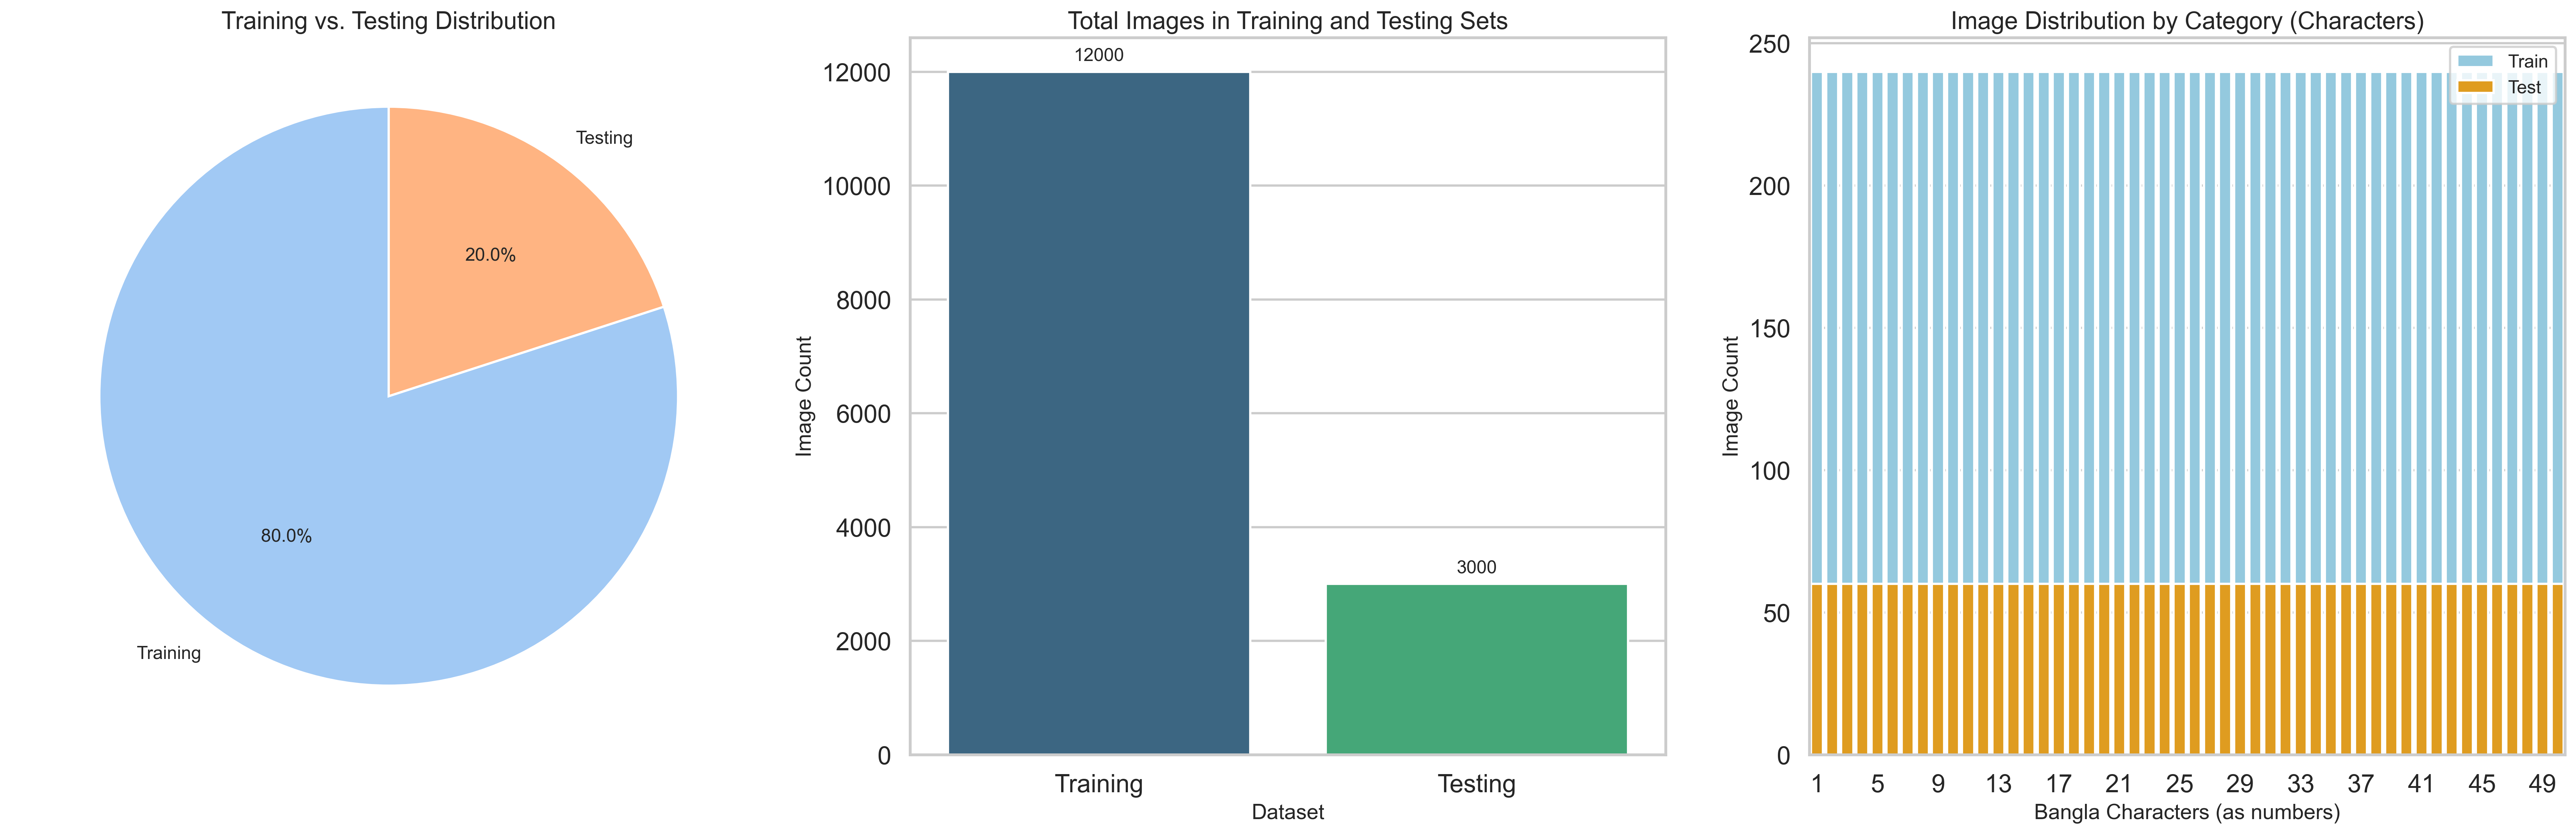

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style
sns.set_theme(style="whitegrid", context="talk")

# Define the paths to the training and testing folders
train_path = "C:/Users/HP/Desktop/My Papers/Conferences/ISACC_2025/Benchmark/data/archive/OCR_Bangla/Bangla Handwritten Characters Dataset/Train"
test_path = "C:/Users/HP/Desktop/My Papers/Conferences/ISACC_2025/Benchmark/data/archive/OCR_Bangla/Bangla Handwritten Characters Dataset/Test"

def count_images(folder_path):
    categories = []
    image_counts = []
    for category in os.listdir(folder_path):
        category_path = os.path.join(folder_path, category)
        if os.path.isdir(category_path):
            categories.append(category)
            image_counts.append(len([f for f in os.listdir(category_path) if os.path.isfile(os.path.join(category_path, f))]))
    return pd.DataFrame({'Category': categories, 'Image Count': image_counts})

# Count images in training and testing folders
train_counts = count_images(train_path)
test_counts = count_images(test_path)

# Merge the counts for comparison
merged_counts = train_counts.merge(test_counts, on="Category", suffixes=("_Train", "_Test"))

# Replace category names with numbers
merged_counts["Category"] = range(1, len(merged_counts) + 1)

# Calculate total images for the pie chart
total_train_images = merged_counts["Image Count_Train"].sum()
total_test_images = merged_counts["Image Count_Test"].sum()

# Plotting the visualizations
fig, axes = plt.subplots(1, 3, figsize=(24, 8), dpi=300)

# Pie chart
colors = sns.color_palette("pastel")[:2]
axes[0].pie(
    [total_train_images, total_test_images],
    labels=["Training", "Testing"],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 12},
)
axes[0].set_title("Training vs. Testing Distribution", fontsize=16)
axes[0].axis("equal")  # Ensure the pie chart is circular

# Total counts bar chart
sns.barplot(
    x=["Training", "Testing"],
    y=[total_train_images, total_test_images],
    palette="viridis",
    ax=axes[1],
)
axes[1].set_title("Total Images in Training and Testing Sets", fontsize=16)
axes[1].set_xlabel("Dataset", fontsize=14)
axes[1].set_ylabel("Image Count", fontsize=14)
for i, count in enumerate([total_train_images, total_test_images]):
    axes[1].text(i, count + 200, str(count), ha='center', fontsize=12)

# Category-wise bar plot
sns.barplot(
    x="Category",
    y="Image Count_Train",
    data=merged_counts,
    color="skyblue",
    label="Train",
    ax=axes[2],
)
sns.barplot(
    x="Category",
    y="Image Count_Test",
    data=merged_counts,
    color="orange",
    label="Test",
    ax=axes[2],
)
axes[2].set_title("Image Distribution by Category (Characters)", fontsize=16)
axes[2].set_xlabel("Bangla Characters (as numbers)", fontsize=14)
axes[2].set_ylabel("Image Count", fontsize=14)
axes[2].legend(fontsize=12)

# Show x-axis labels at every 5 intervals
num_categories = len(merged_counts)
step = 4  # Adjust this for 5 or 10 intervals
axes[2].set_xticks(range(0, num_categories, step))
axes[2].tick_params(axis='x', rotation=0)

# Adjust layout
plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_17244\71767610.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


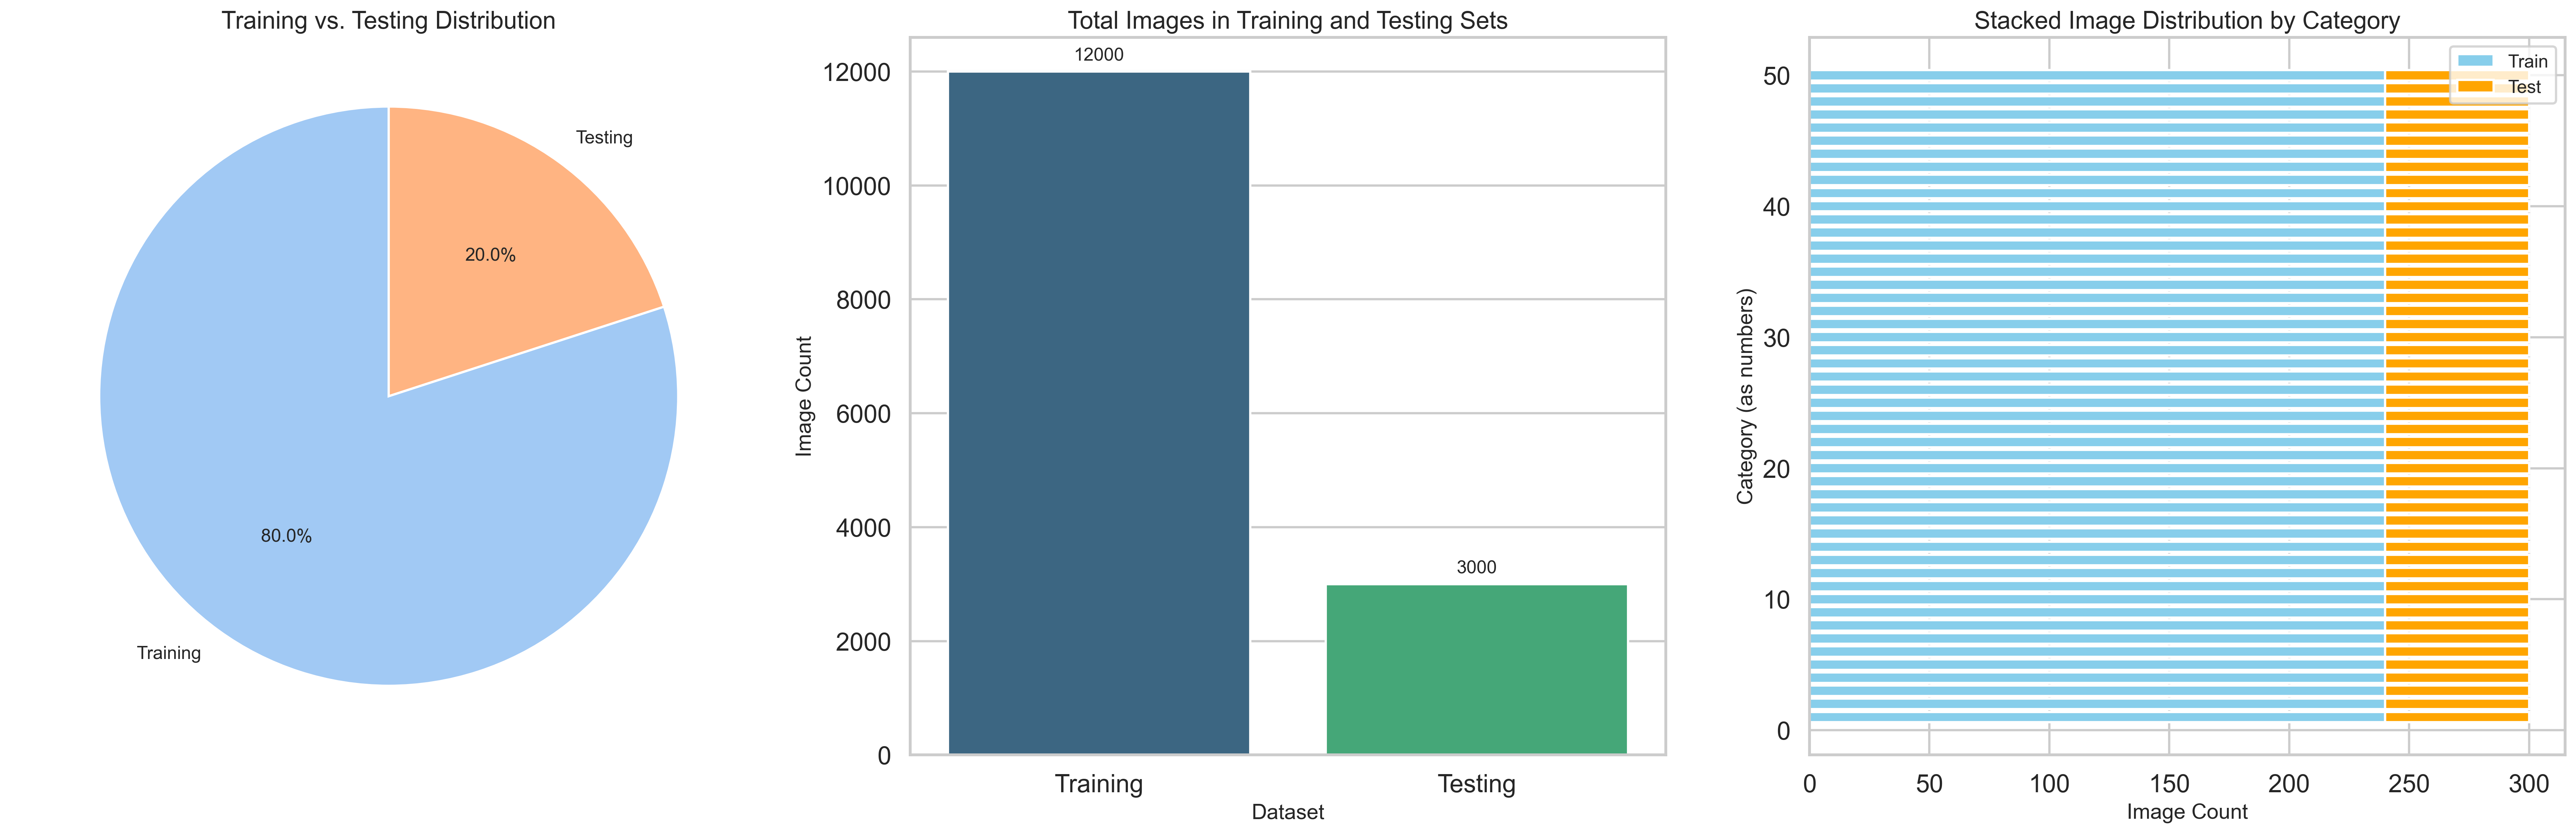

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style
sns.set_theme(style="whitegrid", context="talk")

# Define the paths to the training and testing folders
train_path = "C:/Users/HP/Desktop/My Papers/Conferences/ISACC_2025/Benchmark/data/archive/OCR_Bangla/Bangla Handwritten Characters Dataset/Train"
test_path = "C:/Users/HP/Desktop/My Papers/Conferences/ISACC_2025/Benchmark/data/archive/OCR_Bangla/Bangla Handwritten Characters Dataset/Test"

def count_images(folder_path):
    categories = []
    image_counts = []
    for category in os.listdir(folder_path):
        category_path = os.path.join(folder_path, category)
        if os.path.isdir(category_path):
            categories.append(category)
            image_counts.append(len([f for f in os.listdir(category_path) if os.path.isfile(os.path.join(category_path, f))]))
    return pd.DataFrame({'Category': categories, 'Image Count': image_counts})

# Count images in training and testing folders
train_counts = count_images(train_path)
test_counts = count_images(test_path)

# Merge the counts for comparison
merged_counts = train_counts.merge(test_counts, on="Category", suffixes=("_Train", "_Test"))

# Replace category names with numbers
merged_counts["Category"] = range(1, len(merged_counts) + 1)

# Calculate total images for the pie chart
total_train_images = merged_counts["Image Count_Train"].sum()
total_test_images = merged_counts["Image Count_Test"].sum()

# Plotting the visualizations
fig, axes = plt.subplots(1, 3, figsize=(24, 8), dpi=300)

# Pie chart
colors = sns.color_palette("pastel")[:2]
axes[0].pie(
    [total_train_images, total_test_images],
    labels=["Training", "Testing"],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 12},
)
axes[0].set_title("Training vs. Testing Distribution", fontsize=16)
axes[0].axis("equal")  # Ensure the pie chart is circular

# Total counts bar chart
sns.barplot(
    x=["Training", "Testing"],
    y=[total_train_images, total_test_images],
    palette="viridis",
    ax=axes[1],
)
axes[1].set_title("Total Images in Training and Testing Sets", fontsize=16)
axes[1].set_xlabel("Dataset", fontsize=14)
axes[1].set_ylabel("Image Count", fontsize=14)
for i, count in enumerate([total_train_images, total_test_images]):
    axes[1].text(i, count + 200, str(count), ha='center', fontsize=12)

# Create a new column for the cumulative "Test" count
merged_counts['Cumulative_Test'] = merged_counts['Image Count_Train'] + merged_counts['Image Count_Test']

# Stacked bar chart
axes[2].barh(
    merged_counts['Category'],
    merged_counts['Image Count_Train'],
    color="skyblue",
    label="Train",
)
axes[2].barh(
    merged_counts['Category'],
    merged_counts['Image Count_Test'],
    left=merged_counts['Image Count_Train'],
    color="orange",
    label="Test",
)
axes[2].set_title("Stacked Image Distribution by Category", fontsize=16)
axes[2].set_xlabel("Image Count", fontsize=14)
axes[2].set_ylabel("Category (as numbers)", fontsize=14)
axes[2].legend(fontsize=12)



# Adjust layout
plt.tight_layout()
plt.show()
